In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def cubic_bezier(P, t):
    P = np.matrix(P)
    t = np.array(t).reshape(-1,1)
    return (1-t)**3@P[0,:] + 3*(1-t)**2*t@P[1,:] + 3*(1-t)*t**2@P[2,:] + t**3@P[3,:]

def lerp(P1, P2, t):
    return (1-t)*P1 + P2*t


(3, 2)


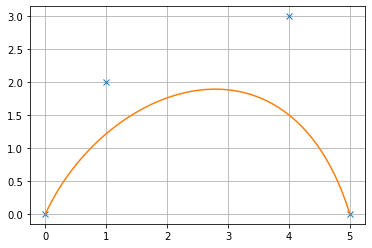

In [22]:
# Courbe de Bézier
P = np.matrix('[0 1 4 5;0 2 3 0]').T

t = np.linspace(0, 1, 100)
b = cubic_bezier(P, t)
plt.plot(P[:,0], P[:,1], 'x')
plt.plot(b[:,0], b[:,1])
plt.grid()

# Export
np.savetxt('cubic_bezier.dat', b)

t0 = 0.4
P1 = np.concatenate([lerp(P[0,:], P[1,:],t0), lerp(P[1,:], P[2,:], t0), lerp(P[2,:], P[3,:], t0)])
P2 = np.concatenate([lerp(P1[0,:], P1[1,:], t0), lerp(P1[1,:], P1[2,:], t0)])
P3 = np.concatenate([lerp(P2[0,:], P2[1,:], t0)])
print(P1.shape)
M = np.concatenate([P, P1,P2, P3])
np.savetxt('cubic_bezier_points.tex', M)